<a href="https://colab.research.google.com/github/Akmal-2253/LogisticRegression/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# df[df['time']!= 'Lunch']  if we only want to show the required coloumn

In [ ]:
df['time'] = df['time'].map({'Lunch':0,'Dinner':1})


In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,1,2
1,10.34,1.66,Male,No,Sun,1,3
2,21.01,3.50,Male,No,Sun,1,3
3,23.68,3.31,Male,No,Sun,1,2
4,24.59,3.61,Female,No,Sun,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,1,3
240,27.18,2.00,Female,Yes,Sat,1,2
241,22.67,2.00,Male,Yes,Sat,1,2
242,17.82,1.75,Male,No,Sat,1,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('time', axis=1)
y = df['time']

# Identify categorical columns
categorical_features = ['sex', 'smoker', 'day']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')

# Apply one-hot encoding to the features
X_encoded = preprocessor.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.25,random_state=42)
x_train

array([[ 1.  ,  0.  ,  1.  , ..., 17.31,  3.5 ,  2.  ],
       [ 0.  ,  1.  ,  0.  , ..., 23.33,  5.65,  2.  ],
       [ 1.  ,  0.  ,  0.  , ..., 16.27,  2.5 ,  2.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  5.75,  1.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , ..., 34.63,  3.55,  2.  ],
       [ 1.  ,  0.  ,  0.  , ..., 44.3 ,  2.5 ,  3.  ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters= {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50,100],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [ ]:
classifier_regressor.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.9506006006006006


In [ ]:
y_predict=classifier_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_test,y_predict)
print(score)

0.9836065573770492


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.98      0.99        44

    accuracy                           0.98        61
   macro avg       0.97      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



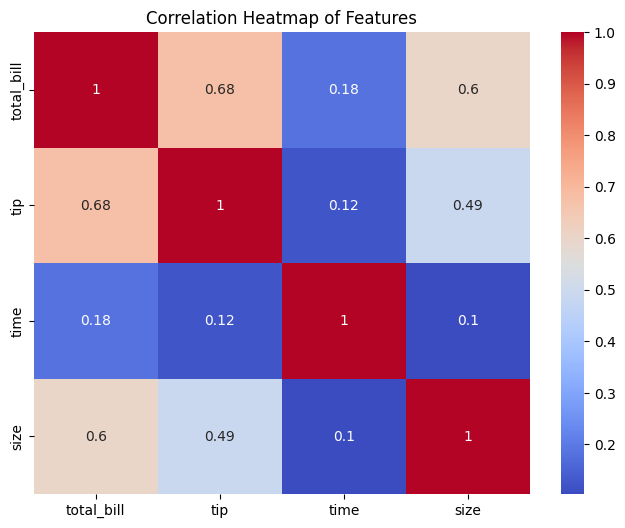

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(['sex', 'smoker', 'day'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

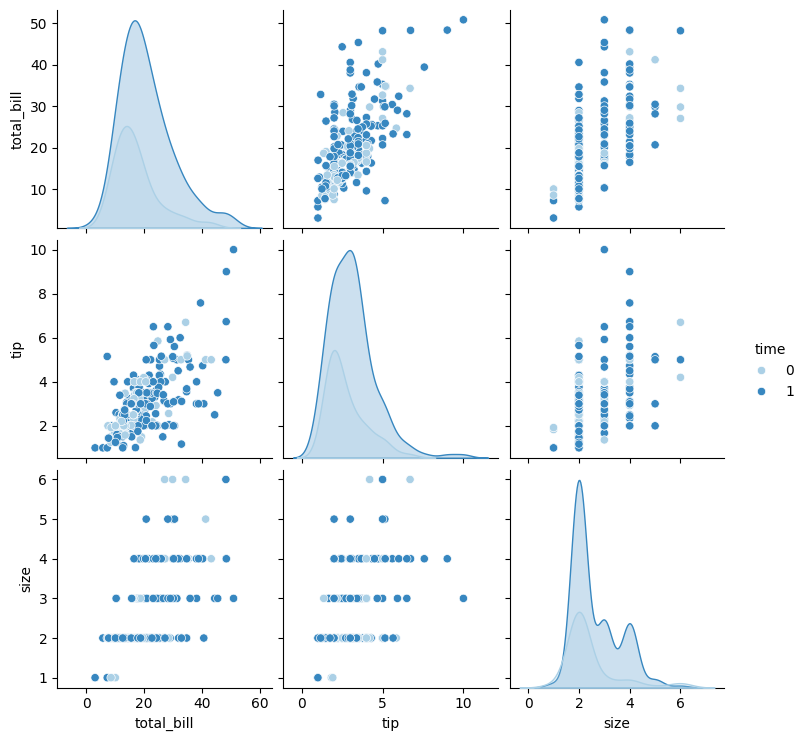

In [ ]:
sns.pairplot(df,hue='time',palette='Blues')